# CSCI E-63 Big Data Analytics - Final Project (Fall 2018)

## Reducing Commute Time with Machine Learning and Graph Analysis

### Author: Walter Yu, Graduate Degree Candidate

### Abstract

The average commute time within each U.S. census division has a large impact on its economy, productivity, infrastructure and environment. Longer commute times can lead to lost wages for workers, additional wearing of highway infrastructure and environmental impacts. As a result, this study evaluates U.S. commuter patterns with the National Household Transportation Survey (NHTS) dataset$^{1}$ provided by the Federal Highway Administration (FHWA) and whether public transportation or additional transportation planning could reduce commute times based on data analysis.

### Introduction

This project continues the analysis developed for the 2017 NHTS Data Challenge. Whereas the contest entry focused on exploratory data analysis (EDA) and visualization, this project will continue analysis with machine learning and graph analysis. Specifically, it seeks to answer the following questions:

1. What additional trends can be identified with machine learning and graph analysis?
2. Can these trends help reduce average U.S. commute times?
3. If so, then what are some recommendations to do so?

Questions covered by the 2017 NHTS Data Challenge were as follows:

1. Which are the census divisions with the most trips per household$^{2}$?
2. What are the average commute distance and time within those divisions?
3. Could mass transit or transportation planning reduce commute times?
4. What are some recommendations for improving commute times based on demographic data$^{3}$?

### Data Cleaning and Preparation

Data cleaning was completed prior to analysis; as a result, the datasets were cleaned to minimize the impact of outlier, missing or repeated values as follows:

1. Replaced empty and missing values since they may cause errors during analysis.
2. Removed negative values since they may skew summary statistics and results.
3. Removed outlier values by removing values greater or less than 3 standard deviations.
4. Outlier values will skew summary statistics such as the mean, median and standard deviation.

After data cleaning, the household, trip and vehicle tables were sorted by census district to start analysis.

### Data Analysis

The 2017 NHTS Data Challenge contest entry analyzed the households, trips and vehicles tables of the NHTS dataset to evaluate commute trends by census division. Specifically, the tables were analyzed to evaluate average commute distance and time. It provided an overview of U.S. commuter trends and recommendations to reduce average commute times.

### Machine Learning

Spark ML was used to continue the 2017 NHTS Data Challenge to evaluate relationships within the NHTS dataset tables; specifically, relationships between average annual trips, miles traveled and commute time. As a result, tables were analyzed as follows:

1. Households - Which factors most influence household vehicle count and likely to result in more miles driven annually?
2. Trips - Which factors most influence vehicle miles driven and results in more pollution and roadway congestion?
3. Vehicles - Which factors most influence annual miles driven and results in more pollution and roadway congestion?

Analysis was completed with the Spark ML decision tree and gradient-boosted tree algorithms.

### Graph Analysis

Spark GraphX was used to evaluate relationships between the households and trips tables; specifically, relationships between census division and trip distance (miles driven) as follows:

1. Create graph between household and trip tables
2. Analyze graph to identify additional relationships
3. In and out-degree relationships validated ML analysis results

### Tools and Modules

The tools and modules listed below were used to analyze data and provide recommendations:

1. Jupyter Notebook - Analysis and documentation were completed using this notebook.
2. Spark ML - Module used to identify additional trends and feature importance.
3. Spark GraphX - Module used to analyze relationships between household and trip tables.
4. Python Modules - The modules listed below will need to be installed in order to run this notebook.

  * Pandas
  * NumPy
  * SciPy
  * Seaborn
  * Matplotlib
  * PySpark (Spark ML)

### Installation
Clone Github repository, then run notebook with [Python](https://www.python.org/) and [Jupyter Notebook](https://jupyter.org/).

### Household Count by Division - Data Analysis

The household count for each census division was calculated to identify the following:

1. Which divisions have the most households within the U.S.?
2. How does household count differ between divisions based on mass transit access?
3. Are these trends influence commuter trends and if so, how can they reduce commute times?

Household count was plotted in the chart below to visualize results as follows:

1. Total Count: The Pacific and Atlantic divisions had the highest count while the Central divisions; this trend is intuitive given that many costal states have higher populations than those in the midwest.
2. Subway Systems: The Pacific and Atlantic had more households with access to a subway system then those which did not have access; however, the Central divisions had more households without access to a subway system than those which did have access.
3. Subway Access: The trend observed above implies that the Pacific and Atlantic regions may have more urban areas with more households centered around transportation hubs instead of more rural or equal distribution of the population as in the Central divisions.
4. Based on these results, household count is highest in the Pacific and Atlantic divisions with a higher percentage of households having access to a subway system whereas household count is lower the Central divisions with lower percentage of households having access to a subway system.

These trends indicate that urban metropolitan areas often have closer access to a subway system which may lead to less driving, environmental impacts and roadway congestion.

### Household Count by Division - Spark ML

Decision tree and gradient boosted tree algorithms were used to continue analysis as follows:

1. Initial data analysis showed that divisions with higher population density were more likely to have access to subways systems; although this observation provides association between population density and mass transit, does it have any impact in reducing vehicle usage?
2. The households table has a household vehicle count value; as a result, machine learning was used to analyze data features for their impact on household vehicle count. Specifically, factors such as frequency of vehicle and mass transit were analyzed.
3. Results showed that higher vehicle usage had high feature importance for predicting household vehicle count. Also, mass transit usage had low feature importance which implies it is independent of household vehicle count.
4. Based on these results, households in urban areas are more likely to be located near mass transit. However, mass usage has low feature importance with vehicle count whereas vehicle usage has has high feature importance for predicting household vehicle count.
5. Finally, the gradient boosted tree slightly improved accuracy above the decision tree algorithm.

Since mass transit access has low impact on vehicle count, then this trend suggests other factors influence vehicle ownership and usage.

In [1]:
# Module 2A - Data Clean:
import csv
import pandas as pd
import numpy as np
import scipy
from scipy import stats
pd.options.mode.chained_assignment = None

# Plotting packages; documentation consulted for examples:
# Reference: https://seaborn.pydata.org/examples/index.html
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 7.5)

# Statistics packages
import statsmodels
from statsmodels.formula.api import ols

# Image import packages
from IPython.display import Image
from IPython.core.display import HTML

# Load trash volume data
hhpub = pd.DataFrame.from_csv('./data/hhpub.csv', index_col=None)
perpub = pd.DataFrame.from_csv('./data/perpub.csv', index_col=None)
trippub = pd.DataFrame.from_csv('./data/trippub.csv', index_col=None)
vehpub = pd.DataFrame.from_csv('./data/vehpub.csv', index_col=None)

# Drop all zero values
hhpub.loc[hhpub.WTHHFIN > 0]
trippub.loc[trippub.WTTRDFIN > 0]

# Remove outliers which are not within 3 standard deviations from mean
hhpub = hhpub[
    np.abs(hhpub.WTHHFIN - hhpub.WTHHFIN.mean()) <= (3*hhpub.WTHHFIN.std())
]
trippub = trippub[
    np.abs(trippub.WTTRDFIN - trippub.WTTRDFIN.mean()) <= (3*trippub.WTTRDFIN.std())
]

# Drop null values since they do not contribute to total
hhpub.dropna(subset=['HOUSEID'], inplace=True)
hhpub.dropna(subset=['HHSTATE'], inplace=True)
hhpub.dropna(subset=['WTHHFIN'], inplace=True)
hhpub.dropna(subset=['CDIVMSAR'], inplace=True)
trippub.dropna(subset=['HOUSEID'], inplace=True)
trippub.dropna(subset=['WTTRDFIN'], inplace=True)
trippub.dropna(subset=['CDIVMSAR'], inplace=True)
perpub.dropna(subset=['CDIVMSAR'], inplace=True)
vehpub.dropna(subset=['ANNMILES'], inplace=True)

# NHTS HH and trip data by division, weighted total and subway
hh_21 = hhpub.loc[hhpub['CDIVMSAR'] == 21]
hh_22 = hhpub.loc[hhpub['CDIVMSAR'] == 22]
hh_31 = hhpub.loc[hhpub['CDIVMSAR'] == 31]
hh_32 = hhpub.loc[hhpub['CDIVMSAR'] == 32]
hh_51 = hhpub.loc[hhpub['CDIVMSAR'] == 51]
hh_52 = hhpub.loc[hhpub['CDIVMSAR'] == 52]
hh_62 = hhpub.loc[hhpub['CDIVMSAR'] == 62]
hh_63 = hhpub.loc[hhpub['CDIVMSAR'] == 63]
hh_91 = hhpub.loc[hhpub['CDIVMSAR'] == 91]
hh_92 = hhpub.loc[hhpub['CDIVMSAR'] == 92]

# Spark and ML Setup
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, Row, SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import Normalizer
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

spark = SparkSession.builder.appName("nhts").getOrCreate()

# Load csv file and process data:
hhpub_sp = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("./data/hhpub.csv")

# Load csv file and process data:
trippub_sp = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("./data/trippub.csv")

# Load csv file and process data:
vehpub_sp = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("./data/vehpub.csv")

# Module 6A - Spark and GraphX Setup:
# Reference: Lecture 11 lecture notes and Lab 11 notebook
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark import SparkContext as sc
from pyspark.sql import SQLContext
from pyspark.sql.functions import *

appName = "nhts_graph"
spark = SparkSession.builder.appName(appName).config('spark.jars.packages','graphframes:graphframes:0.6.0-spark2.3-s_2.11').getOrCreate()

# Load CSV data:
hhpub_gx = spark.read.option("header","true")\
    .csv("./data/hhpub.csv")
perpub_gx = spark.read.option("header","true")\
    .csv("./data/perpub.csv")
trippub_gx = spark.read.option("header","true")\
    .csv("./data/trippub.csv")
vehpub_gx = spark.read.option("header","true")\
    .csv("./data/vehpub.csv")

print('Total Household Count:')
print(hhpub_gx.count())
print('Total People Count:')
print(perpub_gx.count())
print('Total Trip Count:')
print(trippub_gx.count())
print('Total Vehicle Count:')
print(vehpub_gx.count())

Total Household Count:
129696
Total People Count:
264234
Total Trip Count:
923572
Total Vehicle Count:
256115


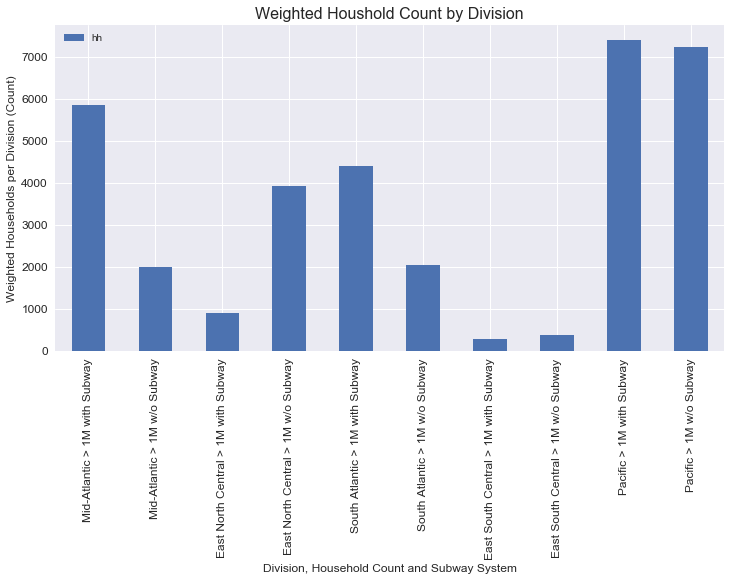

In [3]:
# Module 2B - Household Count:

# Create dataframe for trips by division
# print('hh_21 shape:')
# print(hh_21.shape)
# print('')
# print('hh_22 shape:')
# print(hh_22.shape)
# print('')
# print('hh_31 shape:')
# print(hh_31.shape)
# print('')
# print('hh_32 shape:')
# print(hh_32.shape)
# print('')
# print('hh_51 shape:')
# print(hh_51.shape)
# print('')
# print('hh_52 shape:')
# print(hh_52.shape)
# print('')
# print('hh_62 shape:')
# print(hh_62.shape)
# print('')
# print('hh_63 shape:')
# print(hh_63.shape)
# print('')
# print('hh_91 shape:')
# print(hh_91.shape)
# print('')
# print('hh_92 shape:')
# print(hh_92.shape)
# print('')

hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'hh': [
        5865,
        1989,
        904,
        3932,
        4404,
        2048,
        275,
        376,
        7394,
        7245
    ]
}
hh_divisions_plot = pd.DataFrame(
    hh_divisions,
    columns = ['division', 'hh']
)

# Create bar chart for trips by division
ax = hh_divisions_plot['hh'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Weighted Houshold Count by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Weighted Households per Division (Count)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

+-------------------+----+---+---+----+-----+-----+------+--------------------+
|         prediction|BIKE|BUS|CAR|PARA|PLACE|PRICE|PTRANS|            features|
+-------------------+----+---+---+----+-----+-----+------+--------------------+
| 1.8936551949111076|   5|  4|  1|   5|    2|    1|     4|[5.0,4.0,1.0,5.0,...|
| 1.8936551949111076|   5|  4|  1|   5|    1|    2|     5|[5.0,4.0,1.0,5.0,...|
| 2.1195123894510397|   5|  5|  1|   5|    3|    2|     3|[5.0,5.0,1.0,5.0,...|
| 2.1195123894510397|   5|  5|  1|   5|    3|    3|     5|[5.0,5.0,1.0,5.0,...|
| 2.1195123894510397|   5|  5|  1|   5|    3|    3|     5|[5.0,5.0,1.0,5.0,...|
| 2.1195123894510397|   5|  5|  1|   5|    4|    4|     4|[5.0,5.0,1.0,5.0,...|
|0.21171171171171171|  -9|  1| -1|  -9|    1|    1|     1|[-9.0,1.0,-1.0,-9...|
| 2.3640602104702277|   3|  5|  1|   5|    4|    4|     5|[3.0,5.0,1.0,5.0,...|
| 0.6091954022988506|   5|  5|  5|   5|    2|    3|     4|[5.0,5.0,5.0,5.0,...|
| 2.1195123894510397|   5|  5|  1|   5| 

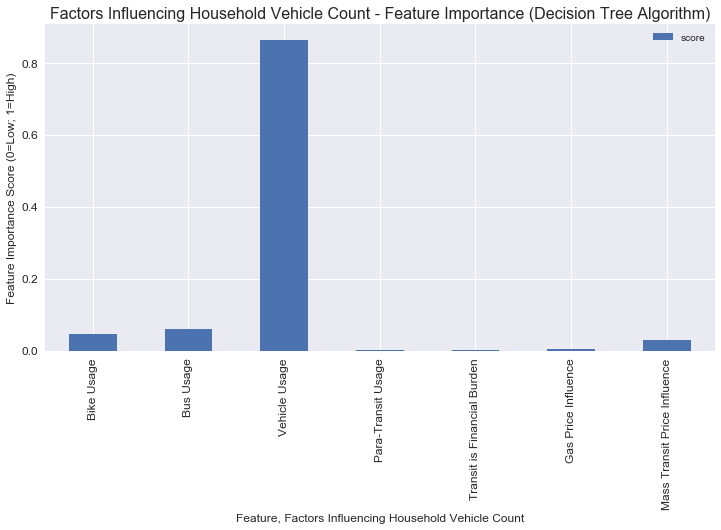

In [9]:
# Module 2C - HH Vehicle Count Factors with Decision Tree Algorithm:

# Implement and analyze decision tree regression with Spark ML
# Reference: HW10, Q5

# Reference: https://stackoverflow.com/questions/46956026/how-to-convert-column-with-string-type-to-int-form-in-pyspark-data-frame
hhpub_sp = hhpub_sp.withColumn("BIKE", hhpub_sp["BIKE"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("BUS", hhpub_sp["BUS"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("CAR", hhpub_sp["CAR"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("HHVEHCNT", hhpub_sp["HHVEHCNT"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PARA", hhpub_sp["PARA"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PLACE", hhpub_sp["PLACE"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PRICE", hhpub_sp["PRICE"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PTRANS", hhpub_sp["PTRANS"].cast(IntegerType()))

# Per slide 37 of lab 10 notes, prepare data for ML:
vectorAssembler = VectorAssembler(inputCols=['BIKE', 'BUS', 'CAR', 'PARA', 'PLACE', 'PRICE', 'PTRANS'], outputCol='features')
vhhpub_sp = vectorAssembler.transform(hhpub_sp)
vhhpub_sp

# Per slide 38 of lab 10 notes, split into train/test datasets:
splits = vhhpub_sp.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]

# Per slide 47 of lab 10 notes, prepare data for ML:
dt = DecisionTreeRegressor(featuresCol='features', labelCol='HHVEHCNT')
dt_model = dt.fit(train)

# Per slide 40 of lab 10 notes, describe summary:
# print("DT Model Summary:")
# train.describe().show()

# Per slide 47 of lab 10 notes, create output table:
dt_predictions = dt_model.transform(test)
dt_predictions.select("prediction","BIKE","BUS","CAR","PARA","PLACE","PRICE","PTRANS","features").show(10)

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="HHVEHCNT", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print('')

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="HHVEHCNT", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print("R Squared (R2) on test data = %g" % r2)
print('')

# Print feature importance:
# Reference: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
print('Feature Importance:')
print(dt_model.featureImportances)

# Plot bar chart for feature importance:
feature_importance = {
    'feature': [0,1,2,3,4,5,6],
    'score': [0.0446868452557,0.0586268748168,0.863075112975,0.000791107496273,0.000836709931205,0.00322482332894,0.0287585261961]
}
feature_importance_plot = pd.DataFrame(
    feature_importance,
    columns = ['feature', 'score']
)

ax = feature_importance_plot['score'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Bike Usage',
    'Bus Usage',
    'Vehicle Usage',
    'Para-Transit Usage',
    'Transit is Financial Burden',
    'Gas Price Influence',
    'Mass Transit Price Influence',
]
plt.title('Factors Influencing Household Vehicle Count - Feature Importance (Decision Tree Algorithm)', fontsize=16)
ax.set_xlabel("Feature, Factors Influencing Household Vehicle Count", fontsize=12)
ax.set_ylabel("Feature Importance Score (0=Low; 1=High)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

+-------------------+----+---+---+----+-----+-----+------+--------------------+
|         prediction|BIKE|BUS|CAR|PARA|PLACE|PRICE|PTRANS|            features|
+-------------------+----+---+---+----+-----+-----+------+--------------------+
| 1.8759342084160502|   5|  4|  1|   5|    2|    1|     4|[5.0,4.0,1.0,5.0,...|
| 2.1851742331474937|   5|  5|  1|   5|    3|    5|     5|[5.0,5.0,1.0,5.0,...|
|  2.271102893790943|   4|  4|  1|   5|    5|    5|     5|[4.0,4.0,1.0,5.0,...|
|  2.078192432037876|   4|  5|  2|   5|    3|    5|     3|[4.0,5.0,2.0,5.0,...|
|  2.348142330357143|   2|  5|  1|   5|    3|    4|     5|[2.0,5.0,1.0,5.0,...|
|  2.400746222594453|   4|  5|  1|   5|    4|    3|     5|[4.0,5.0,1.0,5.0,...|
| 2.1127218257500227|   5|  5|  1|   5|    4|    4|     4|[5.0,5.0,1.0,5.0,...|
| 0.3279613358204647|  -9|  1| -1|  -9|    1|    1|     1|[-9.0,1.0,-1.0,-9...|
| 2.3522649979636734|   3|  5|  1|   5|    3|    2|     4|[3.0,5.0,1.0,5.0,...|
|0.38146184482344175|   5|  1|  4|   5| 

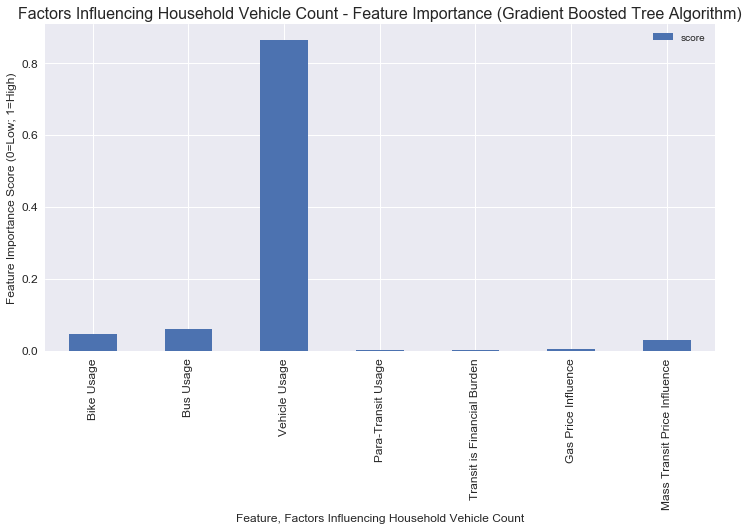

In [10]:
# Module 2D - HH Vehicle Count Factors with Gradient Boosted Tree (GBT) Algorithm:

# Implement and analyze decision tree regression with Spark ML
# Reference: HW10, Q5

# Reference: https://stackoverflow.com/questions/46956026/how-to-convert-column-with-string-type-to-int-form-in-pyspark-data-frame
hhpub_sp = hhpub_sp.withColumn("BIKE", hhpub_sp["BIKE"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("BUS", hhpub_sp["BUS"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("CAR", hhpub_sp["CAR"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("HHVEHCNT", hhpub_sp["HHVEHCNT"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PARA", hhpub_sp["PARA"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PLACE", hhpub_sp["PLACE"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PRICE", hhpub_sp["PRICE"].cast(IntegerType()))
hhpub_sp = hhpub_sp.withColumn("PTRANS", hhpub_sp["PTRANS"].cast(IntegerType()))

# Per slide 37 of lab 10 notes, prepare data for ML:
vectorAssembler = VectorAssembler(inputCols=['BIKE', 'BUS', 'CAR', 'PARA', 'PLACE', 'PRICE', 'PTRANS'], outputCol='features')
vhhpub_sp = vectorAssembler.transform(hhpub_sp)
vhhpub_sp

# Per slide 38 of lab 10 notes, split into train/test datasets:
splits = vhhpub_sp.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]

# Per slide 47 of lab 10 notes, prepare data for ML:
gbt = GBTRegressor(featuresCol='features', labelCol='HHVEHCNT')
gbt_model = gbt.fit(train)

# Per slide 40 of lab 10 notes, describe summary:
# print("GBT Model Summary:")
# train.describe().show()

# Per slide 47 of lab 10 notes, create output table:
gbt_predictions = gbt_model.transform(test)
gbt_predictions.select("prediction","BIKE","BUS","CAR","PARA","PLACE","PRICE","PTRANS","features").show(10)

# Per slide 47 of lab 10 notes, evaluate accuracy:
gbt_evaluator = RegressionEvaluator(labelCol="HHVEHCNT", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print('')

# Per slide 47 of lab 10 notes, evaluate accuracy:
gbt_evaluator = RegressionEvaluator(labelCol="HHVEHCNT", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator.evaluate(gbt_predictions)
print("R Squared (R2) on test data = %g" % r2)
print('')

# Print feature importance:
# Reference: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
print('Feature Importance:')
print(gbt_model.featureImportances)

# Plot bar chart for feature importance:
feature_importance = {
    'feature': [0,1,2,3,4,5,6],
    'score': [0.0446868452557,0.0586268748168,0.863075112975,0.000791107496273,0.000836709931205,0.00322482332894,0.0287585261961]
}
feature_importance_plot = pd.DataFrame(
    feature_importance,
    columns = ['feature', 'score']
)

ax = feature_importance_plot['score'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Bike Usage',
    'Bus Usage',
    'Vehicle Usage',
    'Para-Transit Usage',
    'Transit is Financial Burden',
    'Gas Price Influence',
    'Mass Transit Price Influence',
]
plt.title('Factors Influencing Household Vehicle Count - Feature Importance (Gradient Boosted Tree Algorithm)', fontsize=16)
ax.set_xlabel("Feature, Factors Influencing Household Vehicle Count", fontsize=12)
ax.set_ylabel("Feature Importance Score (0=Low; 1=High)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

### Trips per Household by Census Divisions - Data Analysis

The average trips per household by division were calculated to identify commute trends; as a result, the household table was sorted for census divisions as follows:

1. Selected census divisions with the 5 highest total of weighted households per the NHTS codebook.
2. Divisions were further sorted by ones with and without subway system.
3. The households identified in these divisions were then matched with trips.
4. The weighted trip values within each division were totaled, then divided by total households.
5. Result was average weighted trips per household by division.

The divisions identified with highest total trips per households were as follows:

1. Mid-Atlantic > 1M with Subway
2. Mid-Atlantic > 1M w/o Subway
3. East North Central > 1M with Subway
4. East North Central > 1M w/o Subway
5. South Atlantic > 1M with Subway
6. South Atlantic > 1M w/o Subway
7. East South Central > 1M with Subway
8. East South Central > 1M w/o Subway
9. Pacific > 1M with Subway
10. Pacific > 1M w/o Subway

The results were plotted in the chart below with the following observations:

1. Trip Count: Total trip count was higher in all divisions with access to a subway system than those without access. This trend implies that households with access to a subway system tend to be more densely populated and result in higher trip count.
2. Trip Count Distribution: Trip count were distributed evenly between divisions despite household count differences which may be due to weight ranking or household formation (larger or smaller size).

### Trips per Household by Census Divisions - Spark ML

Decision tree and gradient boosted tree algorithms were used to continue analysis as follows:

1. Initial data analysis showed that divisions with higher population density had higher trip count regardless of household size; although this observation provides association between population density and mass transit, does it have any impact in reducing vehicle miles traveled?
2. The households table has vehicle mile traveled value; as a result, the algorithms were used to analyze data features for their impact on vehicle miles traveled. Specifically, factors such as trip details and urban density were analyzed.
3. Results showed that longer distance and duration trips had high feature importance for predicting vehicle miles traveled. Also, urban density had low feature importance which implies it is independent of vehicle miles traveled.
4. Based on these results, it can be inferred that vehicle miles traveled is likely to be determined by trip distance and duration. However, urban density has low feature importance with vehicle miles traveled.
5. These results are supported by the analysis of households table: vehicle usage is likely to be determined by trip and distance, not urban density, proximity to mass transit or mass transit usage.
6. Finally, the gradient boosted tree slightly improved accuracy above the decision tree algorithm.

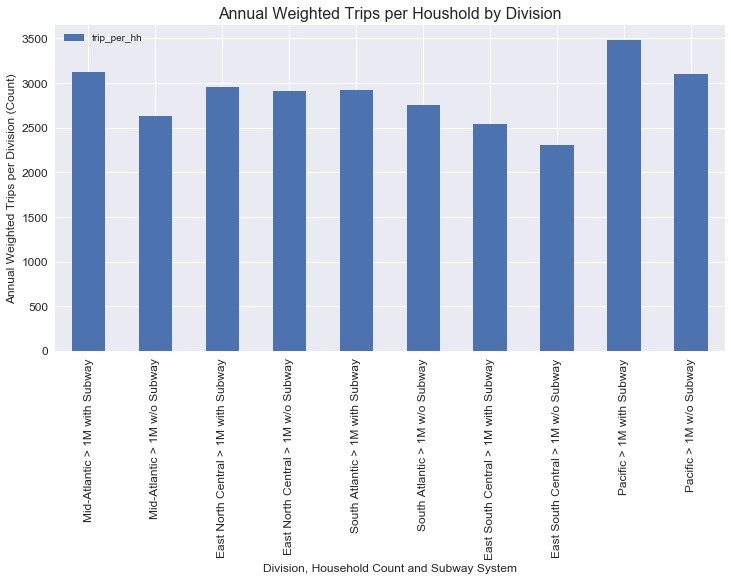

In [5]:
# Module 3A - Trips, Division & Subway System:

# Sum all weighted households by division
hh_21_weight_sum = hh_21['WTHHFIN'].sum()
hh_22_weight_sum = hh_22['WTHHFIN'].sum()
hh_31_weight_sum = hh_31['WTHHFIN'].sum()
hh_32_weight_sum = hh_32['WTHHFIN'].sum()
hh_51_weight_sum = hh_51['WTHHFIN'].sum()
hh_52_weight_sum = hh_52['WTHHFIN'].sum()
hh_62_weight_sum = hh_62['WTHHFIN'].sum()
hh_63_weight_sum = hh_63['WTHHFIN'].sum()
hh_91_weight_sum = hh_91['WTHHFIN'].sum()
hh_92_weight_sum = hh_92['WTHHFIN'].sum()

# Join NHTS trip with HH data to analyze total weighted trips per HH
tr_hh_21 = pd.merge(trippub, hh_21, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_22 = pd.merge(trippub, hh_22, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_31 = pd.merge(trippub, hh_31, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_32 = pd.merge(trippub, hh_32, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_51 = pd.merge(trippub, hh_51, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_52 = pd.merge(trippub, hh_52, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_62 = pd.merge(trippub, hh_62, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_63 = pd.merge(trippub, hh_63, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_91 = pd.merge(trippub, hh_91, left_on='HOUSEID', right_on='HOUSEID')
tr_hh_92 = pd.merge(trippub, hh_92, left_on='HOUSEID', right_on='HOUSEID')

# NHTS trip data by division and weighted total
tr_21_weight_sum = tr_hh_21['WTTRDFIN'].sum()
tr_22_weight_sum = tr_hh_22['WTTRDFIN'].sum()
tr_31_weight_sum = tr_hh_31['WTTRDFIN'].sum()
tr_32_weight_sum = tr_hh_32['WTTRDFIN'].sum()
tr_51_weight_sum = tr_hh_51['WTTRDFIN'].sum()
tr_52_weight_sum = tr_hh_52['WTTRDFIN'].sum()
tr_62_weight_sum = tr_hh_62['WTTRDFIN'].sum()
tr_63_weight_sum = tr_hh_63['WTTRDFIN'].sum()
tr_91_weight_sum = tr_hh_91['WTTRDFIN'].sum()
tr_92_weight_sum = tr_hh_92['WTTRDFIN'].sum()

# Calculate weighted trip per household by division
tr_per_hh_21 = tr_21_weight_sum / hh_21_weight_sum
tr_per_hh_22 = tr_22_weight_sum / hh_22_weight_sum
tr_per_hh_31 = tr_31_weight_sum / hh_31_weight_sum
tr_per_hh_32 = tr_32_weight_sum / hh_32_weight_sum
tr_per_hh_51 = tr_51_weight_sum / hh_51_weight_sum
tr_per_hh_52 = tr_52_weight_sum / hh_52_weight_sum
tr_per_hh_62 = tr_62_weight_sum / hh_62_weight_sum
tr_per_hh_63 = tr_63_weight_sum / hh_63_weight_sum
tr_per_hh_91 = tr_91_weight_sum / hh_91_weight_sum
tr_per_hh_92 = tr_92_weight_sum / hh_92_weight_sum

# Create dataframe for trips by division
tr_hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'trip_per_hh': [
        tr_per_hh_21,
        tr_per_hh_22,
        tr_per_hh_31,
        tr_per_hh_32,
        tr_per_hh_51,
        tr_per_hh_52,
        tr_per_hh_62,
        tr_per_hh_63,
        tr_per_hh_91,
        tr_per_hh_92
    ]
}
tr_hh_divisions_plot = pd.DataFrame(tr_hh_divisions, columns = ['division', 'trip_per_hh'])

# Create bar chart for trips by division
ax = tr_hh_divisions_plot[['trip_per_hh']].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Annual Weighted Trips per Houshold by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Annual Weighted Trips per Division (Count)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

+-------------------+--------+--------+------+--------+-----+--------------------+
|         prediction|CDIVMSAR|TRPMILES|MSACAT|TRVLCMIN|URBAN|            features|
+-------------------+--------+--------+------+--------+-----+--------------------+
|  3.336775368004771|      53|       5|     3|      15|    1|[53.0,5.0,3.0,15....|
|  3.336775368004771|      53|       5|     3|      20|    1|[53.0,5.0,3.0,20....|
|  67.12224448897796|      53|      81|     3|     150|    1|[53.0,81.0,3.0,15...|
|  2.179637665324301|      23|       3|     3|      15|    1|[23.0,3.0,3.0,15....|
|0.34502686809287236|      23|       1|     3|      10|    1|[23.0,1.0,3.0,10....|
|0.34502686809287236|      23|       1|     3|      10|    1|[23.0,1.0,3.0,10....|
|  4.457591088814251|      23|       6|     3|      35|    1|[23.0,6.0,3.0,35....|
|  2.179637665324301|      33|       3|     3|      10|    1|[33.0,3.0,3.0,10....|
|  4.457591088814251|      33|       6|     3|      15|    1|[33.0,6.0,3.0,15....|
|  6

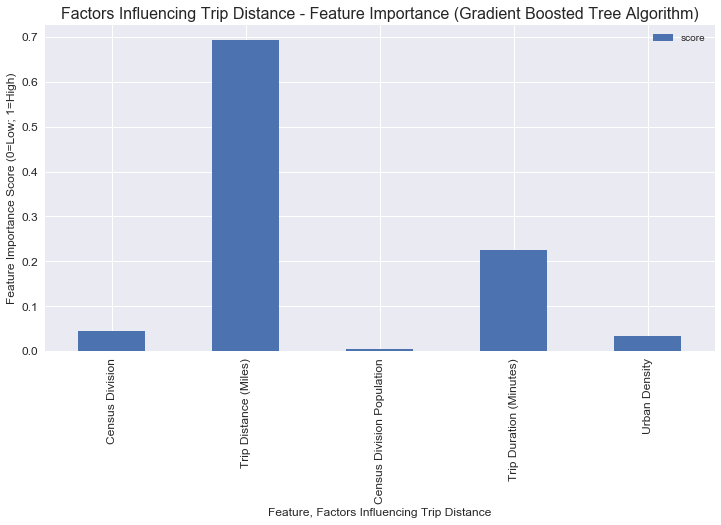

In [11]:
# Module 3B - Trip Distance Factors with Decision Tree Algorithm:

# Implement and analyze decision tree regression with Spark ML
# Reference: HW10, Q5

# Reference: https://stackoverflow.com/questions/46956026/how-to-convert-column-with-string-type-to-int-form-in-pyspark-data-frame
trippub_sp = trippub_sp.withColumn("CDIVMSAR", trippub_sp["CDIVMSAR"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("HBPPOPDN", trippub_sp["HBPPOPDN"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("HBRESDN", trippub_sp["HBRESDN"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("TRPMILES", trippub_sp["TRPMILES"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("TRPTRANS", trippub_sp["TRPTRANS"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("MSACAT", trippub_sp["MSACAT"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("TRVLCMIN", trippub_sp["TRVLCMIN"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("VMT_MILE", trippub_sp["VMT_MILE"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("URBAN", trippub_sp["URBAN"].cast(IntegerType()))

# Per slide 37 of lab 10 notes, prepare data for ML:
# vectorAssembler = VectorAssembler(inputCols=['CDIVMSAR', 'HBPPOPDN', 'HBRESDN', 'TRPMILES', 'MSACAT', 'TRVLCMIN', 'URBAN'], outputCol='features')
vectorAssembler = VectorAssembler(inputCols=['CDIVMSAR', 'TRPMILES', 'MSACAT', 'TRVLCMIN', 'URBAN'], outputCol='features')

# Normalize each Vector using $L^1$ norm.
# Reference: https://spark.apache.org/docs/latest/ml-features.html#normalizer
# normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
# l1NormData = normalizer.transform(trippub_sp)

vtrippub_sp = vectorAssembler.transform(trippub_sp)
vtrippub_sp

# Per slide 38 of lab 10 notes, split into train/test datasets:
splits = vtrippub_sp.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]

# Per slide 47 of lab 10 notes, prepare data for ML:
dt = DecisionTreeRegressor(featuresCol='features', labelCol='VMT_MILE')
dt_model = dt.fit(train)

# Per slide 40 of lab 10 notes, describe summary:
# print("DT Model Summary:")
# train.describe().show()

# Per slide 47 of lab 10 notes, create output table:
dt_predictions = dt_model.transform(test)
# dt_predictions.select("prediction","CDIVMSAR","HBPPOPDN","HBRESDN","TRPMILES","MSACAT","TRVLCMIN","URBAN","features").show(10)
dt_predictions.select("prediction","CDIVMSAR","TRPMILES","MSACAT","TRVLCMIN","URBAN","features").show(10)

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="VMT_MILE", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print('')

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="VMT_MILE", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print("R Squared (R2) on test data = %g" % r2)
print('')

# Print feature importance:
# Reference: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
print('Feature Importance:')
print(dt_model.featureImportances)

# Plot bar chart for feature importance:
feature_importance = {
    'feature': [0,1,2,3,4],
    'score': [0.0455287970717,0.69210811385,0.0037337743339,0.225841999204,0.0327873155401]
}
feature_importance_plot = pd.DataFrame(
    feature_importance,
    columns = ['feature', 'score']
)

ax = feature_importance_plot['score'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Census Division',
    'Trip Distance (Miles)',
    'Census Division Population',
    'Trip Duration (Minutes)',
    'Urban Density'
]
plt.title('Factors Influencing Trip Distance - Feature Importance (Gradient Boosted Tree Algorithm)', fontsize=16)
ax.set_xlabel("Feature, Factors Influencing Trip Distance", fontsize=12)
ax.set_ylabel("Feature Importance Score (0=Low; 1=High)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

+-------------------+--------+--------+------+--------+-----+--------------------+
|         prediction|CDIVMSAR|TRPMILES|MSACAT|TRVLCMIN|URBAN|            features|
+-------------------+--------+--------+------+--------+-----+--------------------+
| 3.5005562912156534|      53|       5|     3|      15|    1|[53.0,5.0,3.0,15....|
| 3.4603084058191538|      53|       5|     3|      20|    1|[53.0,5.0,3.0,20....|
|  71.46832248094142|      53|      84|     3|     120|    1|[53.0,84.0,3.0,12...|
|  71.46832248094142|      53|      81|     3|     150|    1|[53.0,81.0,3.0,15...|
| 2.1056487908396853|      53|       3|     3|      15|    1|[53.0,3.0,3.0,15....|
|  6.214743845135024|      33|       8|     3|      15|    1|[33.0,8.0,3.0,15....|
|  7.752679283871132|      23|      10|     3|      20|    1|[23.0,10.0,3.0,20...|
|-0.4244089328473389|      23|       1|     3|      30|    1|[23.0,1.0,3.0,30....|
|0.45597510527943963|      23|       1|     3|       5|    1|[23.0,1.0,3.0,5.0...|
|0.4

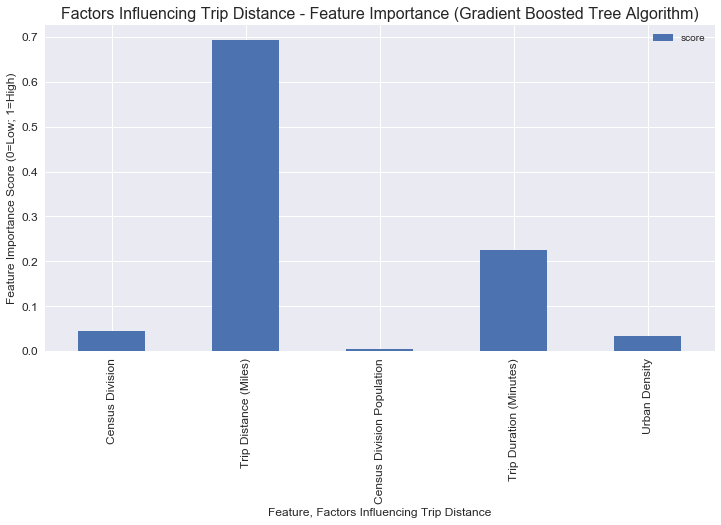

In [12]:
# Module 3C - Trip Distance Factors with Gradient Boosted Tree (GBT) Algorithm::

# Implement and analyze decision tree regression with Spark ML
# Reference: HW10, Q5

# Reference: https://stackoverflow.com/questions/46956026/how-to-convert-column-with-string-type-to-int-form-in-pyspark-data-frame
trippub_sp = trippub_sp.withColumn("CDIVMSAR", trippub_sp["CDIVMSAR"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("HBPPOPDN", trippub_sp["HBPPOPDN"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("HBRESDN", trippub_sp["HBRESDN"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("TRPMILES", trippub_sp["TRPMILES"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("TRPTRANS", trippub_sp["TRPTRANS"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("MSACAT", trippub_sp["MSACAT"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("TRVLCMIN", trippub_sp["TRVLCMIN"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("VMT_MILE", trippub_sp["VMT_MILE"].cast(IntegerType()))
trippub_sp = trippub_sp.withColumn("URBAN", trippub_sp["URBAN"].cast(IntegerType()))

# Per slide 37 of lab 10 notes, prepare data for ML:
# vectorAssembler = VectorAssembler(inputCols=['CDIVMSAR', 'HBPPOPDN', 'HBRESDN', 'TRPMILES', 'MSACAT', 'TRVLCMIN', 'URBAN'], outputCol='features')
vectorAssembler = VectorAssembler(inputCols=['CDIVMSAR', 'TRPMILES', 'MSACAT', 'TRVLCMIN', 'URBAN'], outputCol='features')

# Normalize each Vector using $L^1$ norm.
# Reference: https://spark.apache.org/docs/latest/ml-features.html#normalizer
# normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
# l1NormData = normalizer.transform(trippub_sp)

vtrippub_sp = vectorAssembler.transform(trippub_sp)
vtrippub_sp

# Per slide 38 of lab 10 notes, split into train/test datasets:
splits = vtrippub_sp.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]

# Per slide 47 of lab 10 notes, prepare data for ML:
dt = GBTRegressor(featuresCol='features', labelCol='VMT_MILE')
dt_model = dt.fit(train)

# Per slide 40 of lab 10 notes, describe summary:
# print("DT Model Summary:")
# train.describe().show()

# Per slide 47 of lab 10 notes, create output table:
dt_predictions = dt_model.transform(test)
# dt_predictions.select("prediction","CDIVMSAR","HBPPOPDN","HBRESDN","TRPMILES","MSACAT","TRVLCMIN","URBAN","features").show(10)
dt_predictions.select("prediction","CDIVMSAR","TRPMILES","MSACAT","TRVLCMIN","URBAN","features").show(10)

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="VMT_MILE", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print('')

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="VMT_MILE", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print("R Squared (R2) on test data = %g" % r2)
print('')

# Print feature importance:
# Reference: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
print('Feature Importance:')
print(gbt_model.featureImportances)

# Plot bar chart for feature importance:
feature_importance = {
    'feature': [0,1,2,3,4],
    'score': [0.0455287970717,0.69210811385,0.0037337743339,0.225841999204,0.0327873155401]
}
feature_importance_plot = pd.DataFrame(
    feature_importance,
    columns = ['feature', 'score']
)

ax = feature_importance_plot['score'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Census Division',
    'Trip Distance (Miles)',
    'Census Division Population',
    'Trip Duration (Minutes)',
    'Urban Density'
]
plt.title('Factors Influencing Trip Distance - Feature Importance (Gradient Boosted Tree Algorithm)', fontsize=16)
ax.set_xlabel("Feature, Factors Influencing Trip Distance", fontsize=12)
ax.set_ylabel("Feature Importance Score (0=Low; 1=High)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

### Annual Miles by Census Divisions - Data Analysis

The average miles per household by division were calculated to identify commute trends; as a result, the vehicle table was sorted as follows:

1. Households within each selected division were matched with vehicle values.
2. The annual miles for each joined value were totaled, then divided by total households.
3. Result was average annual miles per household by division.

Results were plotted in chart below with the following observations:

1. Total Miles: Total miles traveled were lower in divisions with access to a subway system than those without access to one (except for the South-Atlantic which had slightly higher miles traveled). This implies that more residents may be taking the subway and reducing the number of total miles traveled, although there may be a higher number of trips within these divisions as identified in the previous section.
2. Pacific/Atlantic Divisions: These divisions showed the largest decrease in miles traveled with access to a subway system than those without access. This implies that subway systems in more urban/densely populated divisions may reduce the total number of miles traveled and minimize impacts to the environment and infrastructure.

### Annual Miles by Census Divisions - Spark ML

Decision tree and gradient boosted tree algorithms were used to continue analysis as follows:

1. Initial data analysis showed that divisions with higher population density and access to mass transit were more likely to have lower annual miles traveled per household; although this observation provides association between population density, mass transit and annual miles traveled, do any other factors have an impact on vehicle miles traveled?
2. The vehicles table has an annual vehicle mile traveled value; as a result, the algorithms were used to analyze data features for their impact on annual vehicle miles traveled. Specifically, factors such as household income, vehicle count and urban density were analyzed.
3. Results showed that household income and vehicle count had high feature importance for predicting vehicle miles traveled. Also, urban density had low feature importance which implies it is independent of annual vehicle miles traveled.
4. Based on these results, annual vehicle miles traveled is likely to be higher in households with higher income and vehicle count. However, urban density has low feature importance with annual vehicle miles traveled.
5. Finally, the gradient boosted tree slightly improved accuracy above the decision tree algorithm.

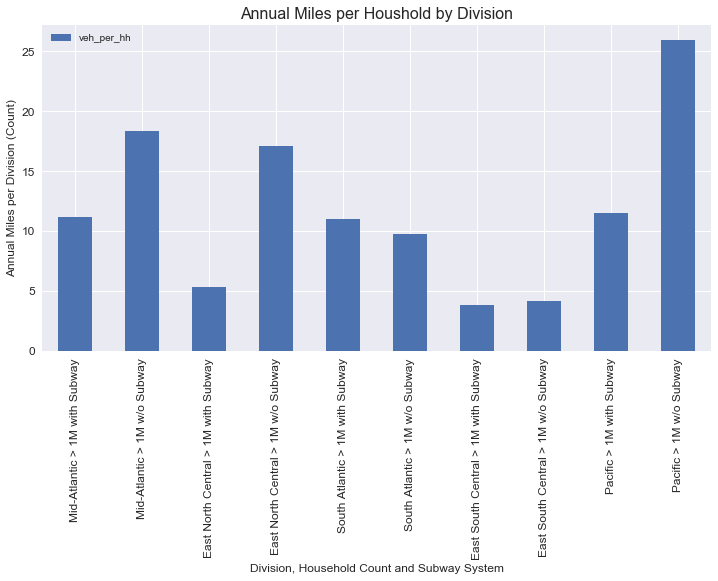

In [6]:
# Module 4A - Miles, Division & Subway System:

# Join NHTS trip with HH data to analyze total weighted trips per HH
veh_hh_21 = pd.merge(vehpub, hh_21, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_22 = pd.merge(vehpub, hh_22, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_31 = pd.merge(vehpub, hh_31, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_32 = pd.merge(vehpub, hh_32, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_51 = pd.merge(vehpub, hh_51, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_52 = pd.merge(vehpub, hh_52, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_62 = pd.merge(vehpub, hh_62, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_63 = pd.merge(vehpub, hh_63, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_91 = pd.merge(vehpub, hh_91, left_on='HOUSEID', right_on='HOUSEID')
veh_hh_92 = pd.merge(vehpub, hh_92, left_on='HOUSEID', right_on='HOUSEID')

# NHTS annual miles by state and weighted total
veh_21_weight_sum = veh_hh_21['ANNMILES'].sum()
veh_22_weight_sum = veh_hh_22['ANNMILES'].sum()
veh_31_weight_sum = veh_hh_31['ANNMILES'].sum()
veh_32_weight_sum = veh_hh_32['ANNMILES'].sum()
veh_51_weight_sum = veh_hh_51['ANNMILES'].sum()
veh_52_weight_sum = veh_hh_52['ANNMILES'].sum()
veh_62_weight_sum = veh_hh_62['ANNMILES'].sum()
veh_63_weight_sum = veh_hh_63['ANNMILES'].sum()
veh_91_weight_sum = veh_hh_91['ANNMILES'].sum()
veh_92_weight_sum = veh_hh_92['ANNMILES'].sum()

# Calculate weighted trip per household by state
veh_per_hh_21 = veh_21_weight_sum / hh_21_weight_sum
veh_per_hh_22 = veh_22_weight_sum / hh_22_weight_sum
veh_per_hh_31 = veh_31_weight_sum / hh_31_weight_sum
veh_per_hh_32 = veh_32_weight_sum / hh_32_weight_sum
veh_per_hh_51 = veh_51_weight_sum / hh_51_weight_sum
veh_per_hh_52 = veh_52_weight_sum / hh_52_weight_sum
veh_per_hh_62 = veh_62_weight_sum / hh_62_weight_sum
veh_per_hh_63 = veh_63_weight_sum / hh_63_weight_sum
veh_per_hh_91 = veh_91_weight_sum / hh_91_weight_sum
veh_per_hh_92 = veh_92_weight_sum / hh_92_weight_sum

# Create dataframe for trips by division
veh_hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'veh_per_hh': [
        veh_per_hh_21,
        veh_per_hh_22,
        veh_per_hh_31,
        veh_per_hh_32,
        veh_per_hh_51,
        veh_per_hh_52,
        veh_per_hh_62,
        veh_per_hh_63,
        veh_per_hh_91,
        veh_per_hh_92
    ]
}
veh_hh_divisions_plot = pd.DataFrame(
    veh_hh_divisions,
    columns = ['division', 'veh_per_hh']
)

ax = veh_hh_divisions_plot[['veh_per_hh']].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Annual Miles per Houshold by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Annual Miles per Division (Count)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

+------------------+-------+--------+------+--------+-----+---------+--------------------+
|        prediction|DRVRCNT|HHFAMINC|HHSIZE|HHVEHCNT|URBAN|URBANSIZE|            features|
+------------------+-------+--------+------+--------+-----+---------+--------------------+
| 6082.288530161427|      2|       8|     2|       4|    4|        6|[2.0,8.0,2.0,4.0,...|
| 6082.288530161427|      2|       8|     2|       4|    4|        6|[2.0,8.0,2.0,4.0,...|
| 7002.416086620263|      1|      10|     1|       2|    1|        3|[1.0,10.0,1.0,2.0...|
| 7002.416086620263|      1|      10|     1|       2|    1|        3|[1.0,10.0,1.0,2.0...|
| 6276.774784066005|      2|       3|     2|       2|    1|        1|[2.0,3.0,2.0,2.0,...|
|6882.2065326633165|      2|       5|     2|       2|    1|        2|[2.0,5.0,2.0,2.0,...|
|  8839.07404523689|      2|      11|     2|       2|    1|        2|[2.0,11.0,2.0,2.0...|
| 5115.942189979596|      2|      10|     2|       6|    4|        6|[2.0,10.0,2.0,6.0...|

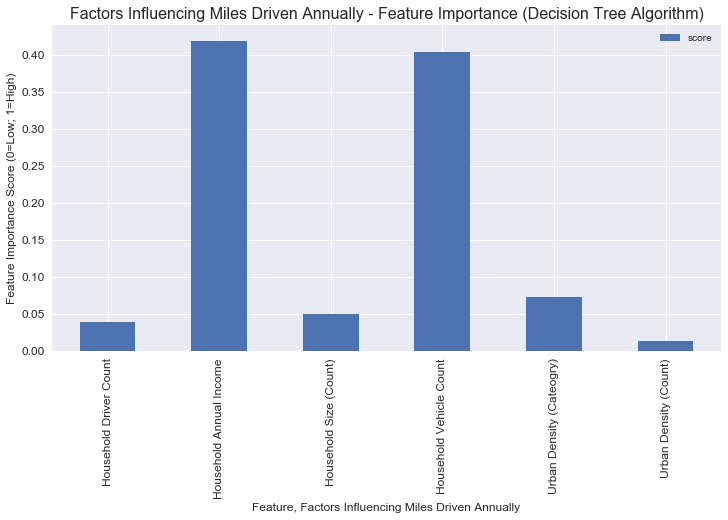

In [13]:
# Module 4B - Vehicle Mileage Factors with Decision Tree Algorithm:

# Implement and analyze decision tree regression with Spark ML
# Reference: HW10, Q5

# Reference: https://stackoverflow.com/questions/46956026/how-to-convert-column-with-string-type-to-int-form-in-pyspark-data-frame
vehpub_sp = vehpub_sp.withColumn("ANNMILES", vehpub_sp["ANNMILES"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("DRVRCNT", vehpub_sp["DRVRCNT"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("HHFAMINC", vehpub_sp["HHFAMINC"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("HHSIZE", vehpub_sp["HHSIZE"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("HHVEHCNT", vehpub_sp["HHVEHCNT"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("URBAN", vehpub_sp["URBAN"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("URBANSIZE", vehpub_sp["URBANSIZE"].cast(IntegerType()))

# Per slide 37 of lab 10 notes, prepare data for ML:
vectorAssembler = VectorAssembler(inputCols=['DRVRCNT', 'HHFAMINC', 'HHSIZE', 'HHVEHCNT', 'URBAN', 'URBANSIZE'], outputCol='features')

# Normalize each Vector using $L^1$ norm.
# Reference: https://spark.apache.org/docs/latest/ml-features.html#normalizer
# normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
# l1NormData = normalizer.transform(vehpub_sp)

vvehpub_sp = vectorAssembler.transform(vehpub_sp)
vvehpub_sp

# Per slide 38 of lab 10 notes, split into train/test datasets:
splits = vvehpub_sp.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]

# Per slide 47 of lab 10 notes, prepare data for ML:
dt = DecisionTreeRegressor(featuresCol='features', labelCol='ANNMILES')
dt_model = dt.fit(train)

# Per slide 40 of lab 10 notes, describe summary:
# print("DT Model Summary:")
# train.describe().show()

# Per slide 47 of lab 10 notes, create output table:
dt_predictions = dt_model.transform(test)
dt_predictions.select("prediction","DRVRCNT","HHFAMINC","HHSIZE","HHVEHCNT","URBAN","URBANSIZE","features").show(10)

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="ANNMILES", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print('')

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="ANNMILES", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print("R Squared (R2) on test data = %g" % r2)
print('')

# Print feature importance:
# Reference: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
print('Feature Importance:')
print(dt_model.featureImportances)

# Plot bar chart for feature importance:
feature_importance = {
    'feature': [0,1,2,3,4,5],
    'score': [0.039418766457,0.419406388312,0.0504730968827,0.403731009982,0.0729282733944,0.0140424649711]
}
feature_importance_plot = pd.DataFrame(
    feature_importance,
    columns = ['feature', 'score']
)

ax = feature_importance_plot['score'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Household Driver Count',
    'Household Annual Income',
    'Household Size (Count)',
    'Household Vehicle Count',
    'Urban Density (Cateogry)',
    'Urban Density (Count)'
]
plt.title('Factors Influencing Miles Driven Annually - Feature Importance (Decision Tree Algorithm)', fontsize=16)
ax.set_xlabel("Feature, Factors Influencing Miles Driven Annually", fontsize=12)
ax.set_ylabel("Feature Importance Score (0=Low; 1=High)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

+------------------+-------+--------+------+--------+-----+---------+--------------------+
|        prediction|DRVRCNT|HHFAMINC|HHSIZE|HHVEHCNT|URBAN|URBANSIZE|            features|
+------------------+-------+--------+------+--------+-----+---------+--------------------+
| 6214.388753518102|      3|       7|     3|       5|    1|        1|[3.0,7.0,3.0,5.0,...|
| 6061.538465370632|      2|       8|     2|       4|    4|        6|[2.0,8.0,2.0,4.0,...|
| 8746.542273900868|      1|      10|     1|       2|    1|        3|[1.0,10.0,1.0,2.0...|
| 6082.852097682957|      2|       3|     2|       2|    1|        1|[2.0,3.0,2.0,2.0,...|
|10107.374135804686|      2|      10|     2|       2|    1|        3|[2.0,10.0,2.0,2.0...|
|6356.6661137154015|      2|      10|     2|       6|    4|        6|[2.0,10.0,2.0,6.0...|
|6356.6661137154015|      2|      10|     2|       6|    4|        6|[2.0,10.0,2.0,6.0...|
|6356.6661137154015|      2|      10|     2|       6|    4|        6|[2.0,10.0,2.0,6.0...|

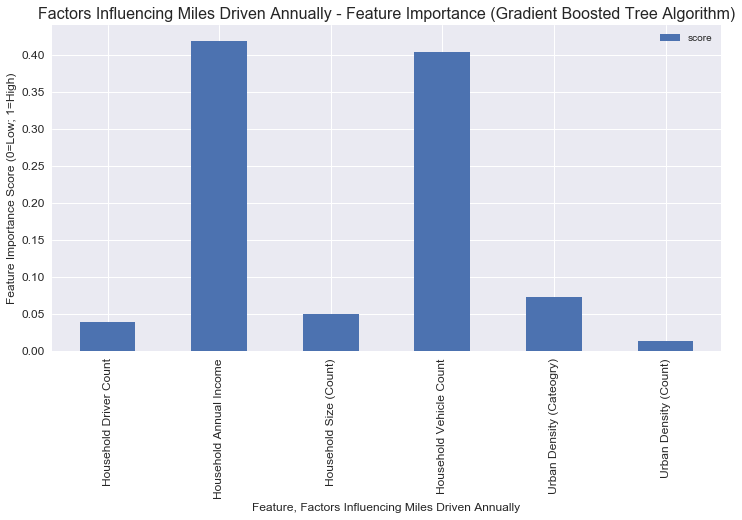

In [14]:
# Module 4C - Vehicle Mileage Factors with Decision Tree Algorithm:

# Implement and analyze decision tree regression with Spark ML
# Reference: HW10, Q5

# Reference: https://stackoverflow.com/questions/46956026/how-to-convert-column-with-string-type-to-int-form-in-pyspark-data-frame
vehpub_sp = vehpub_sp.withColumn("ANNMILES", vehpub_sp["ANNMILES"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("DRVRCNT", vehpub_sp["DRVRCNT"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("HHFAMINC", vehpub_sp["HHFAMINC"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("HHSIZE", vehpub_sp["HHSIZE"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("HHVEHCNT", vehpub_sp["HHVEHCNT"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("URBAN", vehpub_sp["URBAN"].cast(IntegerType()))
vehpub_sp = vehpub_sp.withColumn("URBANSIZE", vehpub_sp["URBANSIZE"].cast(IntegerType()))

# Per slide 37 of lab 10 notes, prepare data for ML:
vectorAssembler = VectorAssembler(inputCols=['DRVRCNT', 'HHFAMINC', 'HHSIZE', 'HHVEHCNT', 'URBAN', 'URBANSIZE'], outputCol='features')

# Normalize each Vector using $L^1$ norm.
# Reference: https://spark.apache.org/docs/latest/ml-features.html#normalizer
# normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
# l1NormData = normalizer.transform(vehpub_sp)

vvehpub_sp = vectorAssembler.transform(vehpub_sp)
vvehpub_sp

# Per slide 38 of lab 10 notes, split into train/test datasets:
splits = vvehpub_sp.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]

# Per slide 47 of lab 10 notes, prepare data for ML:
dt = GBTRegressor(featuresCol='features', labelCol='ANNMILES')
dt_model = dt.fit(train)

# Per slide 40 of lab 10 notes, describe summary:
# print("DT Model Summary:")
# train.describe().show()

# Per slide 47 of lab 10 notes, create output table:
dt_predictions = dt_model.transform(test)
dt_predictions.select("prediction","DRVRCNT","HHFAMINC","HHSIZE","HHVEHCNT","URBAN","URBANSIZE","features").show(10)

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="ANNMILES", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print('')

# Per slide 47 of lab 10 notes, evaluate accuracy:
dt_evaluator = RegressionEvaluator(labelCol="ANNMILES", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print("R Squared (R2) on test data = %g" % r2)
print('')

# Print feature importance:
# Reference: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
print('Feature Importance:')
print(gbt_model.featureImportances)

# Plot bar chart for feature importance:
feature_importance = {
    'feature': [0,1,2,3,4,5],
    'score': [0.039418766457,0.419406388312,0.0504730968827,0.403731009982,0.0729282733944,0.0140424649711]
}
feature_importance_plot = pd.DataFrame(
    feature_importance,
    columns = ['feature', 'score']
)

ax = feature_importance_plot['score'].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Household Driver Count',
    'Household Annual Income',
    'Household Size (Count)',
    'Household Vehicle Count',
    'Urban Density (Cateogry)',
    'Urban Density (Count)'
]
plt.title('Factors Influencing Miles Driven Annually - Feature Importance (Gradient Boosted Tree Algorithm)', fontsize=16)
ax.set_xlabel("Feature, Factors Influencing Miles Driven Annually", fontsize=12)
ax.set_ylabel("Feature Importance Score (0=Low; 1=High)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

### Commute Time per Household by Census Divisions

The average commute time per household by division were calculated to identify commute trends; as a result, the trips table was sorted as follows:

1. The households within each selected division were matched with trip values.
2. The commute time for each joined value were totaled, then divided by total households.
3. Result was average commute time per household by division.

Results were plotted in chart below with the following observations:

1. Average Commute: Higher commute times were observed in all divisions with access to a subway system which may be a result of them being located in urban areas with higher traffic congestion. In addition, this observation implies that subway systems are having an impact in reducing commute time within areas that already have high traffic congestion.
2. Commute Time Distribution: Average commute time was slightly higher in the Pacific/Atlantic divisions and lower in the Central regions. This observation implies that the Pacific/Atlantic divisions have more urban areas with shorter distances, whereas the Central divisions have more rural areas with longer distances.

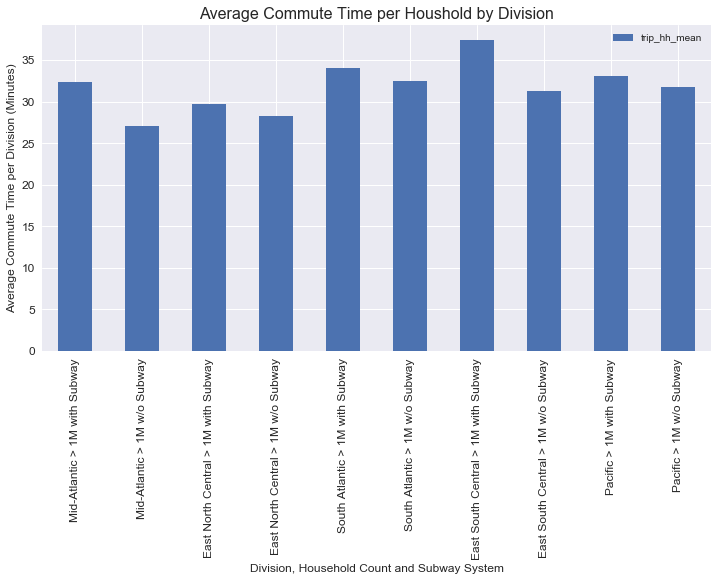

In [7]:
# Module 5A - Commute Time, Division & Subway System:

# Include only trips for work
# print("Before data clean:")
# print("")
# print("trippub shape:")
# print(trippub.shape)
# print("")
#
# trippub.loc[trippub['TRIPPURP'] == 'HBW']
#
# print("After data clean:")
# print("")
# print("trippub shape:")
# print(trippub.shape)
# print("")
#
# print("Columns after sort:")
# print("")
# print("TRIPPURP column:")
# print(trippub['TRIPPURP'])
# print("")

# Join NHTS trip with HH data to analyze total weighted trips per HH
trip_hh_21 = pd.merge(trippub, hh_21, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_22 = pd.merge(trippub, hh_22, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_31 = pd.merge(trippub, hh_31, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_32 = pd.merge(trippub, hh_32, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_51 = pd.merge(trippub, hh_51, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_52 = pd.merge(trippub, hh_52, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_62 = pd.merge(trippub, hh_62, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_63 = pd.merge(trippub, hh_63, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_91 = pd.merge(trippub, hh_91, left_on='HOUSEID', right_on='HOUSEID')
trip_hh_92 = pd.merge(trippub, hh_92, left_on='HOUSEID', right_on='HOUSEID')

# NHTS annual miles by state and weighted total
trip_hh_21['COMMUTE'] = trip_hh_21['ENDTIME'] - trip_hh_21['STRTTIME']
trip_hh_22['COMMUTE'] = trip_hh_22['ENDTIME'] - trip_hh_22['STRTTIME']
trip_hh_31['COMMUTE'] = trip_hh_31['ENDTIME'] - trip_hh_31['STRTTIME']
trip_hh_32['COMMUTE'] = trip_hh_32['ENDTIME'] - trip_hh_32['STRTTIME']
trip_hh_51['COMMUTE'] = trip_hh_51['ENDTIME'] - trip_hh_51['STRTTIME']
trip_hh_52['COMMUTE'] = trip_hh_52['ENDTIME'] - trip_hh_52['STRTTIME']
trip_hh_62['COMMUTE'] = trip_hh_62['ENDTIME'] - trip_hh_62['STRTTIME']
trip_hh_63['COMMUTE'] = trip_hh_63['ENDTIME'] - trip_hh_63['STRTTIME']
trip_hh_91['COMMUTE'] = trip_hh_91['ENDTIME'] - trip_hh_91['STRTTIME']
trip_hh_92['COMMUTE'] = trip_hh_92['ENDTIME'] - trip_hh_92['STRTTIME']

trip_hh_mean_21 = trip_hh_21['COMMUTE'].mean()
trip_hh_mean_22 = trip_hh_22['COMMUTE'].mean()
trip_hh_mean_31 = trip_hh_31['COMMUTE'].mean()
trip_hh_mean_32 = trip_hh_32['COMMUTE'].mean()
trip_hh_mean_51 = trip_hh_51['COMMUTE'].mean()
trip_hh_mean_52 = trip_hh_52['COMMUTE'].mean()
trip_hh_mean_62 = trip_hh_62['COMMUTE'].mean()
trip_hh_mean_63 = trip_hh_63['COMMUTE'].mean()
trip_hh_mean_91 = trip_hh_91['COMMUTE'].mean()
trip_hh_mean_92 = trip_hh_92['COMMUTE'].mean()

# Create dataframe for trips by division
trip_hh_divisions = {
    'division': [
        21,
        22,
        31,
        32,
        51,
        52,
        62,
        63,
        91,
        92
    ],
    'trip_hh_mean': [
        trip_hh_mean_21,
        trip_hh_mean_22,
        trip_hh_mean_31,
        trip_hh_mean_32,
        trip_hh_mean_51,
        trip_hh_mean_52,
        trip_hh_mean_62,
        trip_hh_mean_63,
        trip_hh_mean_91,
        trip_hh_mean_92
    ]
}
trip_hh_divisions_plot = pd.DataFrame(
    trip_hh_divisions,
    columns = ['division', 'trip_hh_mean']
)

ax = trip_hh_divisions_plot[['trip_hh_mean']].plot(
    kind='bar',
    title ="Weighted Value",
    figsize=(12, 6),
    legend=True,
    fontsize=12
)
x_labels = [
    'Mid-Atlantic > 1M with Subway',
    'Mid-Atlantic > 1M w/o Subway',
    'East North Central > 1M with Subway',
    'East North Central > 1M w/o Subway',
    'South Atlantic > 1M with Subway',
    'South Atlantic > 1M w/o Subway',
    'East South Central > 1M with Subway',
    'East South Central > 1M w/o Subway',
    'Pacific > 1M with Subway',
    'Pacific > 1M w/o Subway'
]
plt.title('Average Commute Time per Houshold by Division', fontsize=16)
ax.set_xlabel("Division, Household Count and Subway System", fontsize=12)
ax.set_ylabel("Average Commute Time per Division (Minutes)", fontsize=12)
ax.set_xticklabels(x_labels)
plt.show()

### Graph Analysis of Commute Time with Spark and GraphX

Spark and GraphX were used to identify additional trends from the dataset as follows:

1. Create graph between household and trip tables
2. Analyze graph to identify additional relationships
3. In and out-degree relationships validated ML analysis results

Divisions with highest trip count are as follows (10 highest listed):

1. West/South Central (AR, LA, OK, TX) > 1M population w/o subway system
2. South Atlantic (DE, FL, GA, MD, NC, SC, WV, VA) < 1M population
3. Pacific (AK, CA, HI, OR, WA) < 1M population
4. Mid-Atlantic (NY, NJ, PA) < 1M population
5. Pacific (AK, CA, HI, OR, WA) > 1M population w/subway system
6. Pacific (AK, CA, HI, OR, WA) > 1M population w/o subway system
7. East North Central (IL, IN, MI, OH, WI) < 1M population
8. Mid-Atlantic (NY, NJ, PA) > 1M population w/subway system
9. West/South Central (AR, LA, OK, TX) < 1M population
10. South Atlantic (DE, FL, GA, MD, NC, SC, WV, VA) < 1M population

Results were as follows:

1. In-Degree relationships showed that most trips were less than 5 miles which suggests residents may be driving to complete parts of their commute not covered by mass transit or choosing to drive on short trips instead of taking mass transit.
2. Out-Degree relationships showed that the census divisions with the highest trip count typically had less than 1M in population and/or lack access to mass transit.
3. Although previous analysis demonstrated that trip count was equally distributed between divisions, the graph analysis shows that divisions with lower population density and without mass transit access were connected with high total trip count. However since these were shorter trips, it suggests that residents in these areas drive additional trips due to lack of mass transit access.
4. These results validate the trends observed in ML analysis; specifically, driving behavior is associated with urban density and access to mass transit.

In [2]:
# Module 6A - Spark and GraphX Setup:
# Reference: Lecture 11 lecture notes and Lab 11 notebook

# Module 6A - Spark and GraphX Setup:
# Reference: Lecture 11 lecture notes and Lab 11 notebook
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark import SparkContext as sc
from pyspark.sql import SQLContext
from pyspark.sql.functions import *

appName = "nhts_graph"
spark = SparkSession.builder.appName(appName).config('spark.jars.packages','graphframes:graphframes:0.6.0-spark2.3-s_2.11').getOrCreate()

# Load CSV data:
hhpub_gx = spark.read.option("header","true")\
    .csv("./data/hhpub.csv")
perpub_gx = spark.read.option("header","true")\
    .csv("./data/perpub.csv")
trippub_gx = spark.read.option("header","true")\
    .csv("./data/trippub.csv")
vehpub_gx = spark.read.option("header","true")\
    .csv("./data/vehpub.csv")

print('Total Household Count:')
print(hhpub_gx.count())
print('Total People Count:')
print(perpub_gx.count())
print('Total Trip Count:')
print(trippub_gx.count())
print('Total Vehicle Count:')
print(vehpub_gx.count())

# Set vertices/edges:
hh_vertices = hhpub_gx
trip_edges = trippub_gx
hh_vertices = hhpub_gx.withColumnRenamed("CDIVMSAR", "id").distinct()
trip_edges = trippub_gx\
    .withColumnRenamed("CDIVMSAR", "src")\
    .withColumnRenamed("VMT_MILE", "dst")

# Create graph:
# spark = SparkSession.builder.appName(appName).config('spark.jars.packages','graphframes:graphframes:0.6.0-spark2.3-s_2.11').getOrCreate()
# !pyspark --packages graphframes:graphframes:0.6.0-spark2.3-s_2.11
from graphframes import *
graph = GraphFrame(hh_vertices, trip_edges  )
type(graph)
graph.cache()

# Summary statistics:
print('')
print("Total Number of Households: " + str(graph.vertices.count()))
print("Total Number of Relationships in Graph: " + str(graph.edges.count()))
print("Total Number of Relationships in Original Data: " + str(trip_edges.count()))

# print('')
# print('Show edges:')
# graph.edges.groupBy("src", "dst").count().orderBy(desc("count")).show(50)

# Graph degrees:
print('')
print('Query in-degrees:')
inDeg = graph.inDegrees
inDeg.orderBy(desc("inDegree")).show(50, False)

print('Query out-degrees:')
inDeg = graph.outDegrees
inDeg.orderBy(desc("outDegree")).show(50, False)

Total Household Count:
129696
Total People Count:
264234
Total Trip Count:
923572
Total Vehicle Count:
256115

Total Number of Households: 129696
Total Number of Relationships in Graph: 923572
Total Number of Relationships in Original Data: 923572

Query in-degrees:
+-----+--------+
|id   |inDegree|
+-----+--------+
|-1   |312273  |
|1    |264     |
|2    |157     |
|0.556|155     |
|0.444|146     |
|0.111|140     |
|1.141|134     |
|0.902|132     |
|0.985|132     |
|1.504|130     |
|0.786|130     |
|1.056|130     |
|0.836|129     |
|0.949|129     |
|1.185|128     |
|0.5  |128     |
|1.196|127     |
|0.913|127     |
|3    |127     |
|1.234|126     |
|0.876|126     |
|5    |125     |
|0.897|125     |
|0.839|125     |
|1.282|125     |
|0.993|124     |
|1.016|124     |
|0.689|124     |
|1.044|124     |
|1.003|123     |
|1.514|123     |
|0.361|123     |
|1.55 |122     |
|0.917|122     |
|1.351|122     |
|0.93 |122     |
|0.666|122     |
|0.735|122     |
|1.432|121     |
|1.325|121     |
|1

### Conclusion

This project answered the questions posed in the introduction as follows:

1. What additional trends can be identified with machine learning and graph analysis?
<br></br>
<br></br>
**Households Table: Higher vehicle usage had high feature importance for predicting household vehicle count. Also, mass transit usage had low feature importance which implies it is independent of household vehicle count. Based on these results, it can be inferred that households in urban areas are more likely to be located near mass transit. However, mass usage has low feature importance with vehicle count whereas vehicle usage has has high feature importance for predicting household vehicle count.**
<br></br>
<br></br>
**Trips Table: Longer distance and duration trips had high feature importance for predicting vehicle miles traveled. Also, urban density had low feature importance which implies it is independent of vehicle miles traveled. Based on these results, it can be inferred that vehicle miles traveled is likely to be determined by trip distance and duration. However, urban density has low feature importance with vehicle miles traveled.**
<br></br>
<br></br>
**Vehicles Table: Household income and vehicle count had high feature importance for predicting vehicle miles traveled. Also, urban density had low feature importance which implies it is independent of annual vehicle miles traveled. Based on these results, it can be inferred that annual vehicle miles traveled is likely to be higher in households with higher income and vehicle count. However, urban density has low feature importance with annual vehicle miles traveled.**
<br></br>
<br></br>
**Driver Behavior: The analysis demonstrated that vehicle count and usage are not influenced by mass transit access; however, access does help reduce overall miles traveled and trip duration. Residents in areas without mass transit intuitively drive more frequently. Residents with high income typically had a higher vehicle count per household. As a result, residents in rural areas or higher income would be target demographics to analyze driving behavior.**
<br></br>
<br></br>

2. Can these trends help reduce average U.S. commute times?
<br></br>
<br></br>
**Since vehicle count and usage are influenced by income level and location, residents with higher income or in rural areas would be target demographics to analyze driving behavior. Additional analysis of trip type and comparison with vehicle usage may provide additional insights into travel.**
<br></br>
<br></br>

3. If so, then what are some recommendations to do so?
<br></br>
<br></br>
**Analyzing select demographics and trip types insight into how to influence driving behavior to reduce vehicle usage. In addition, living within an urban area with mass transit offers a convenient alternative to driving and intuitively reduces vehicle usage.**
<br></br>
<br></br>

### Next Steps

The following steps can be taken to continue project results:

1. Continue analysis of demographic types; specifically. residents with higher income or in rural areas.
2. Continue analysis of trip type; specifically, reason for taking shorter trips (commute, errands, etc.).
3. Continue graph analysis and build subgraphs of trips with multiple destinations.

### Citations

$^{1}$ NHTS Dataset: https://nhts.ornl.gov/
<br></br>
$^{2}$ NHTS Users Guide, Section 7.10 (p.63): https://nhts.ornl.gov/assets/2017UsersGuide.pdf
<br></br>
$^{3}$ Demographic Data: http://www.city-data.com/
<br></br>
$^{4}$ U.S. News Article: https://www.usnews.com/news/best-states/rankings/infrastructure/transportation
<br></br>
$^{5}$ Wired Article: https://www.wired.com/story/traffic-economy-fixes/
<br></br>

### Terms and Definitions

EDA: Exploratory Data Analysis
<br></br>
ML: Machine Learning
<br></br>
NHTS: National Household Transportation Survey
<br></br>